**by: [João Ataíde](https://www.joaoataide.com/)**
___

In [1]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.axis('off')
    plt.show()

## **Load Data**

In [3]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\para-repositorio\imagem.jpeg"}

In [4]:
image = cv2.imread(args["image"])
#image = image[0:2000, 500:2000]
print("Width: %d pixels" % (image.shape[1]))
print("Height: %d pixels" % (image.shape[0]))
print("Channels: %d " % (image.shape[2]))

Width: 1280 pixels
Height: 960 pixels
Channels: 3 


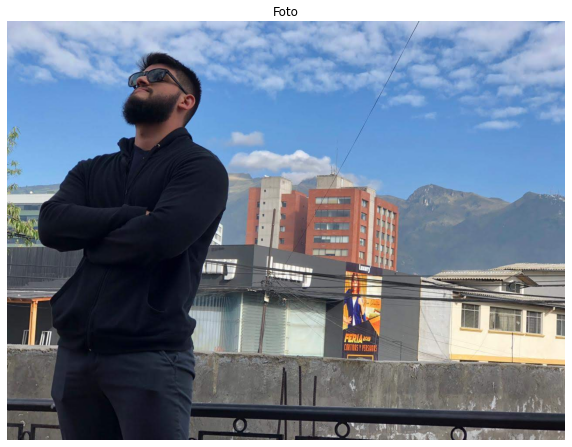

In [5]:
plt_imshow("Foto", image)

## **Kernel**
https://setosa.io/ev/image-kernels/
https://en.wikipedia.org/wiki/Convolutional_neural_network

In [6]:
matriz2 = np.array([[202, 119, 154], [106, 119, 11], [186, 48, 250]])

In [7]:
kernel = np.ones(matriz2.shape, dtype ="uint8")
K = 1/9 * kernel
print(signal.convolve2d(matriz2, K, mode='valid'))

[[132.77777778]]


In [8]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(signal.convolve2d(matriz2, kernel, mode='valid'))

[[174]]


In [9]:
matriz2 = np.array([[18, 143, 222], [233, 179, 97], [234, 142, 149]])

In [10]:
kernel = np.ones(matriz2.shape, dtype ="uint8")
K = 1/9 * kernel
print(signal.convolve2d(matriz2, K, mode='valid'))

[[157.44444444]]


## **Morphological Operations**

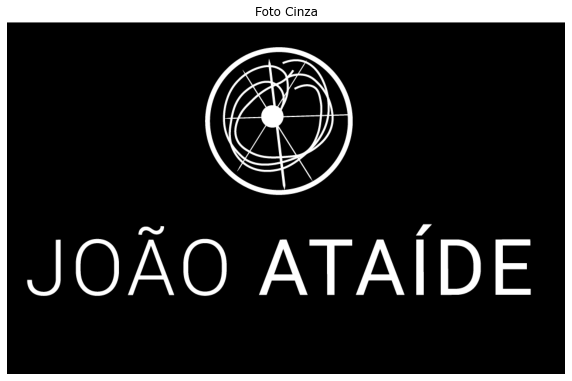

In [11]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\para-repositorio\logo.png"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Foto Cinza", gray)

### *Erosion*

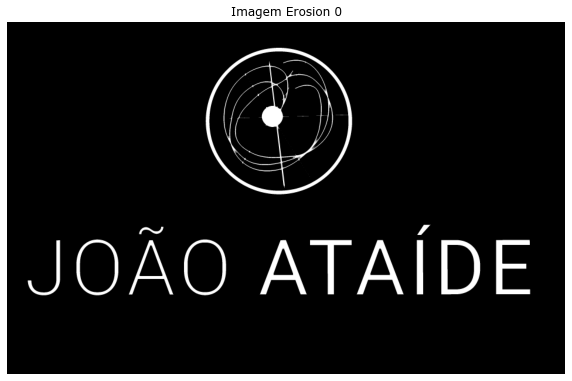

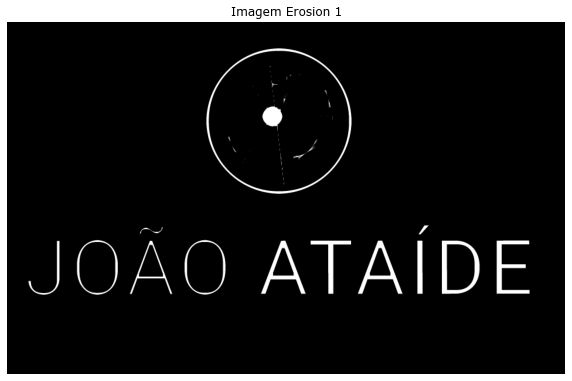

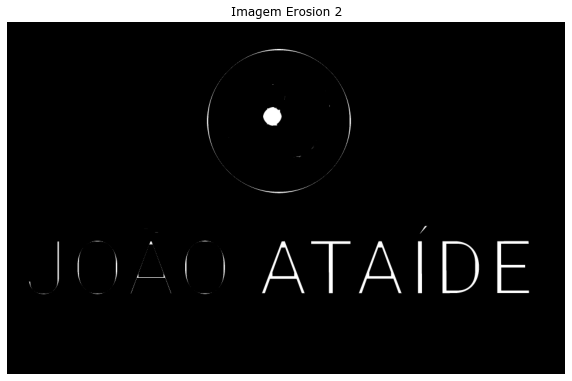

In [12]:
for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations = i +1)
    plt_imshow(f"Imagem Erosion {i}", eroded)

### *Dilations*

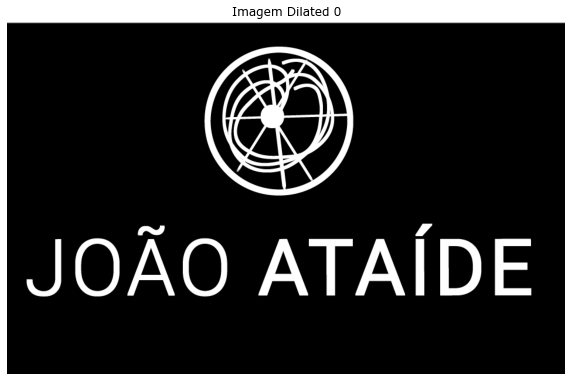

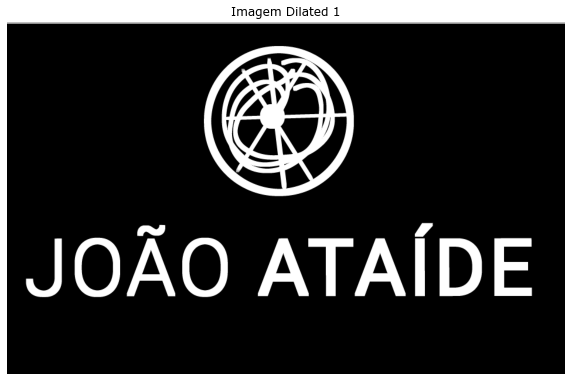

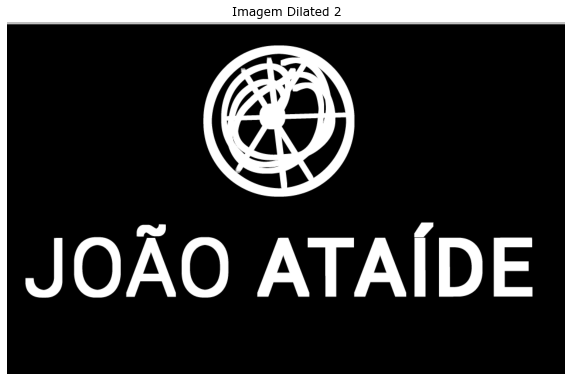

In [13]:
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations = i +1)
    plt_imshow(f"Imagem Dilated {i}", dilated)

### *Opening*

In [14]:
kernelSizes = [(3, 3), (5, 5), (7, 7), (9, 9)]

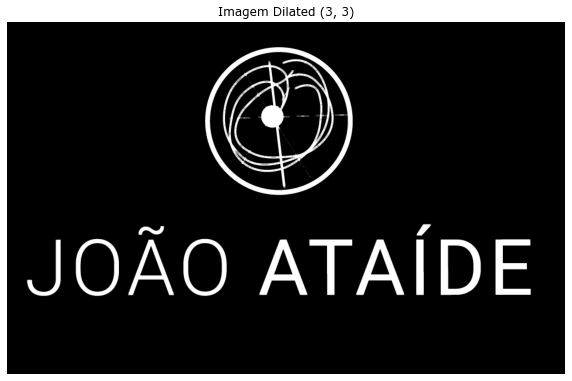

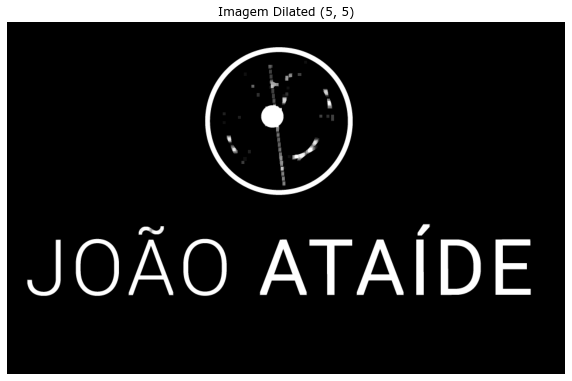

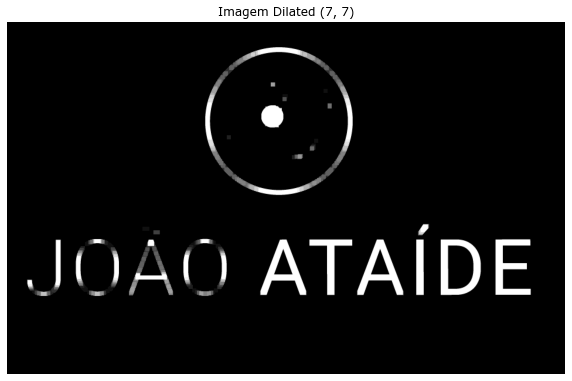

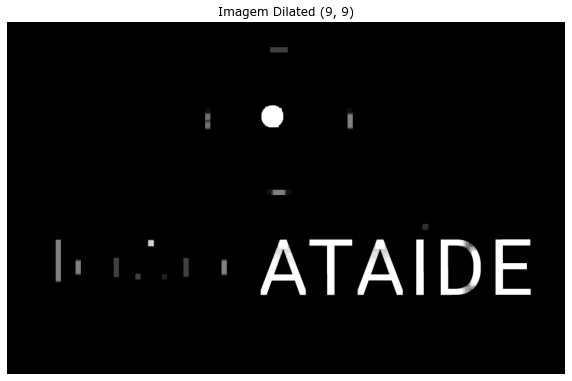

In [15]:
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray.copy(), cv2.MORPH_OPEN, kernel)
    plt_imshow(f"Imagem Dilated {kernelSize}", opening)

### *Closing*

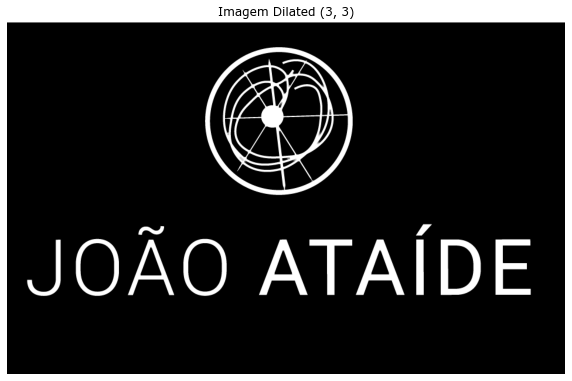

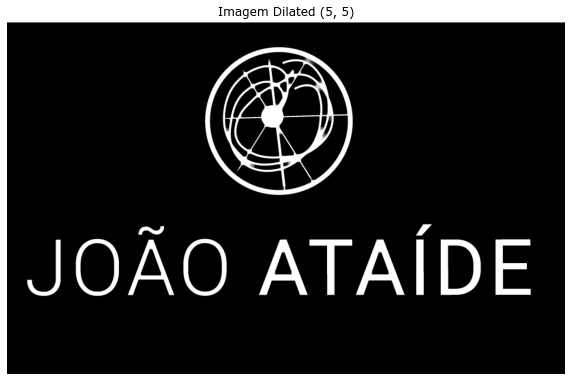

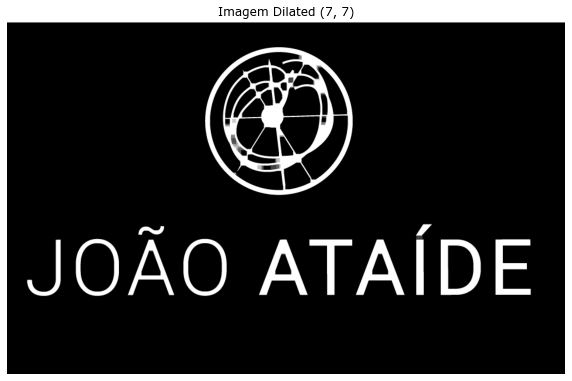

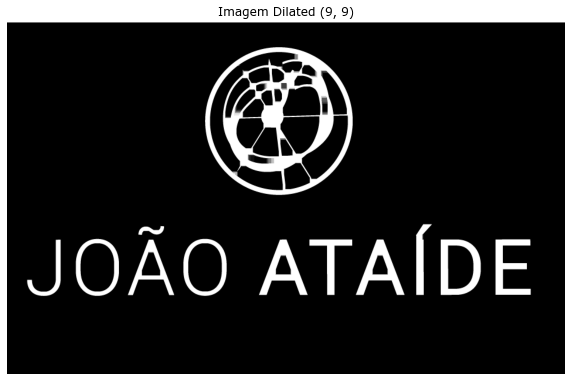

In [16]:
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    plt_imshow(f"Imagem Dilated {kernelSize}", closing)

### *Morphological Gradient*

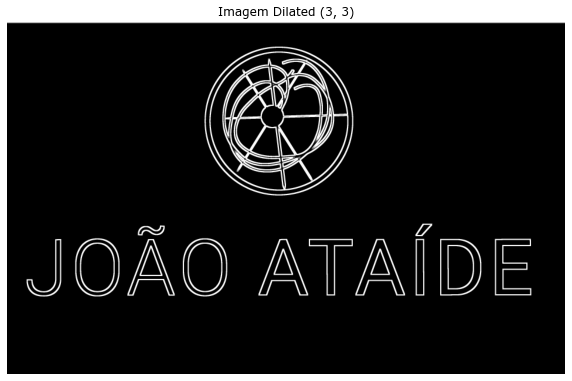

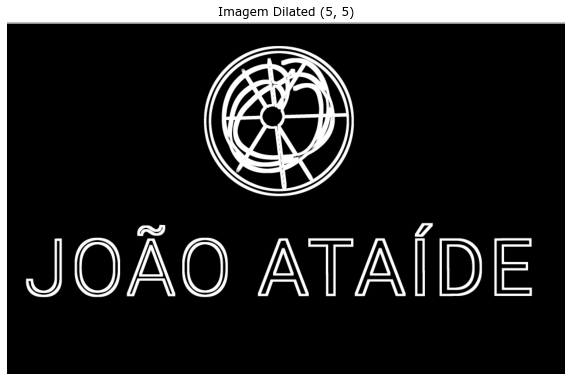

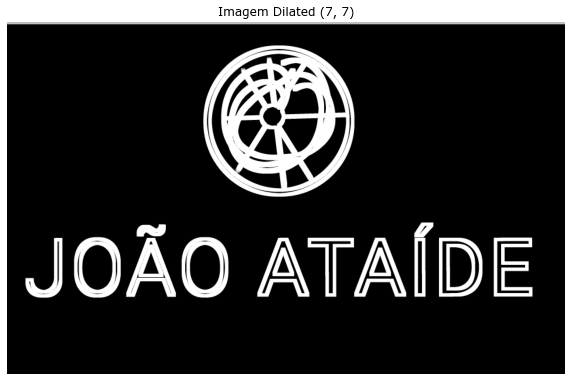

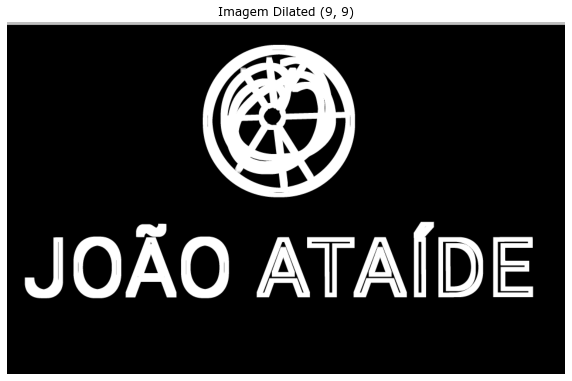

In [17]:
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    plt_imshow(f"Imagem Dilated {kernelSize}", gradient)

### *TopHat/White hat*

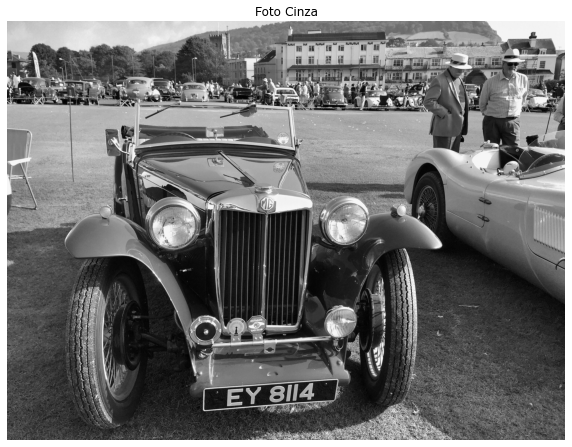

In [23]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\para-repositorio\car.jpg"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Foto Cinza", gray)

In [30]:
shape_kernel = (75, 10) #(width, height)
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, shape_kernel)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

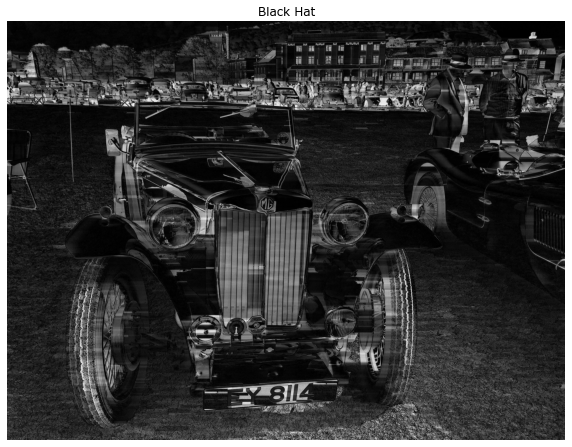

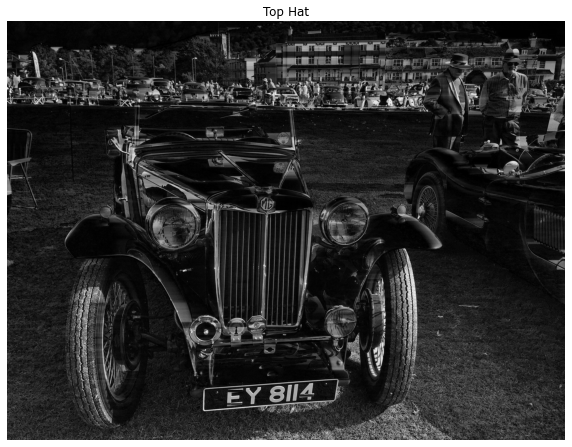

In [31]:
plt_imshow("Black Hat", blackhat)
plt_imshow("Top Hat", tophat)